In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mesh_import import mesh
import mesh.affix as affix
from mesh.affix import CkipAffixoids
from mesh.affix import AffixoidAnalyzer, ByCharAnalyzer
from mesh.affix import ctm_analysis
import torch.nn.functional as F

E:\LangOn\OntoDeepLex\src\mesh\cns.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
ctm = ctm_analysis.get_bychar_ctm_models()

c:\python38\lib\site-packages\torch\serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.activation.Softplus' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\python38\lib\site-packages\torch\serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
ctm.model.n_components

100

In [4]:
asbc_dir = mesh.get_data_dir() / "asbc/"
with (asbc_dir/"asbc5_words.pkl").open("rb") as fin:
    words = pickle.load(fin)

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.400e+01, 2.030e+02,
        5.290e+03, 9.173e+03, 3.499e+03, 1.221e+03]),
 array([3.0192556, 3.1750515, 3.3308473, 3.4866433, 3.6424391, 3.798235 ,
        3.9540308, 4.1098266, 4.2656226, 4.421418 , 4.5772142],
       dtype=float32),
 <a list of 10 Patch objects>)

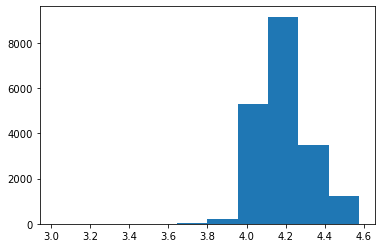

In [5]:
plt.hist(ctm.get_topic_entropy())

In [6]:
ctm.get_charloc_entropy("人_")

3.9913208

In [7]:
data_path = mesh.get_data_dir() / "affix/bychar_proc_data.pkl"
if data_path.exists():
    with data_path.open("rb") as fin:
        data = pickle.load(fin)
charlocs = data["charloc"]

In [6]:
analyzer = ByCharAnalyzer()

In [7]:
frame = analyzer.analyze()
frame

,affixoid,affix_type,form,nword,isstart,isend,ex_wfreq,log_ex_wfreq,prod_morph,pos_entropy,ctm_entropy
0,時_,start,時,166,0,166,23001,10.043336,4.254739,3.925094,4.056471
1,_間,end,間,152,152,0,23118,10.048410,4.314932,3.811898,4.005905
2,三_,start,三,1556,0,1556,12035,9.395657,6.994056,3.367432,4.081256
3,_月,end,月,185,185,0,13095,9.480062,4.564680,3.711330,4.192704
4,十_,start,十,630,0,630,16743,9.725795,6.071436,3.394608,4.115445
...,...,...,...,...,...,...,...,...,...,...,...
4888,乎乎_,start,乎乎,1,0,1,1,0.693147,0.000000,-0.000000,4.568219
4889,_蛻,end,蛻,2,2,0,2,1.098612,0.693147,-0.000000,4.561064
4890,_俯,end,俯,1,1,0,1,0.693147,0.000000,-0.000000,4.565611
4891,堰_,start,堰,1,0,1,1,0.693147,0.000000,-0.000000,4.566850


In [12]:
ctm.get_charloc_entropy("時_")

4.0564713

In [12]:
affix_dir = mesh.get_data_dir() / "affix"